## Finding only 'b'

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

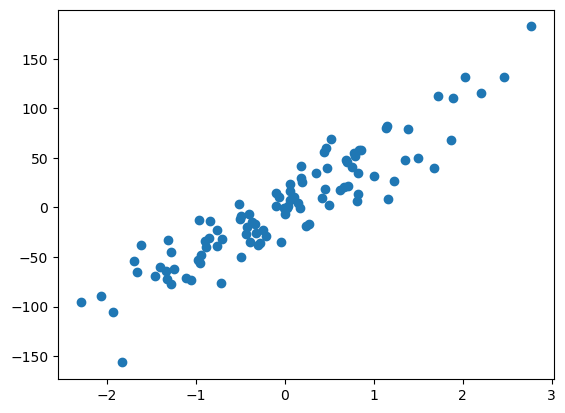

In [30]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)
plt.scatter(X, y)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[49.34224565]
1.7473539323361962


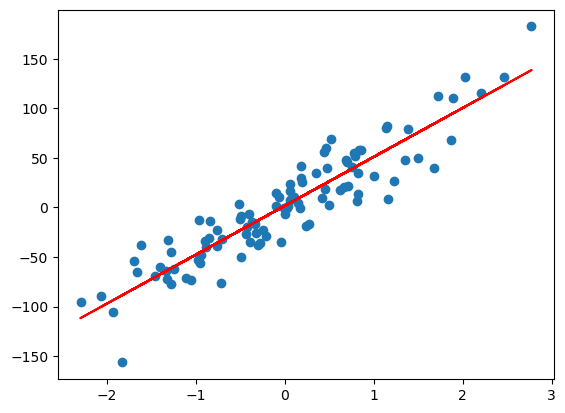

In [32]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red')

In [33]:
m = 49.34

In [59]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 49.34
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope, self.b)
        print(self.b)

In [93]:
gd_reg = GDRegressor(0.001, 1000)

In [94]:
gd_reg.fit(X, y)

-24349.468191334738 -95.65053180866526
-19479.57455306779 -76.17095725559747
-15583.65964245423 -60.58729761314324
-12466.927713963383 -48.12036989917986
-9973.542171170711 -38.14682772800915
-7978.833736936566 -30.167993991072585
-6383.066989549253 -23.784927001523332
-5106.453591639403 -18.678473409883928
-4085.162873311522 -14.593310536572407
-3268.1302986492183 -11.325180237923188
-2614.504238919375 -8.710675999003813
-2091.603391135499 -6.619072607868315
-1673.2827129083998 -4.9457898949599155
-1338.6261703267198 -3.6071637246331956
-1070.9009362613756 -2.53626278837182
-856.7207490091007 -1.6795420393627194
-685.3765992072807 -0.9941654401554386
-548.3012793658243 -0.4458641607896143
-438.6410234926595 -0.00722313729695484
-350.91281879412753 0.3436896814971727
-280.7302550353022 0.624419936532475
-224.58420402824163 0.8490041405607166
-179.66736322259345 1.02867150378331
-143.7338905780746 1.1724053943613848
-114.98711246245975 1.2873925068238445
-91.98968996996771 1.37938219679

## Finding both 'm' & 'b'

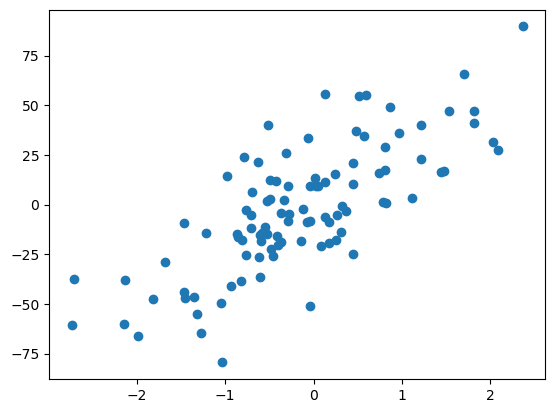

In [107]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)
plt.scatter(X, y)

In [108]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X, y)

LinearRegression()

In [132]:
r2_score(reg.predict(X), y)

0.25807772596047507

In [126]:
print(reg.coef_)
print(reg.intercept_)

[23.90384803]
1.4316935471188073


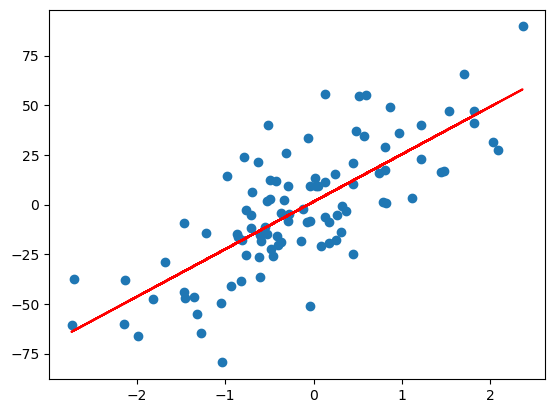

In [110]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), c='red')

In [112]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(reg, X, y, cv=10, scoring='r2'))

0.5004277062341809

In [142]:
class GDRegressor1:
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
            print(loss_slope_b, loss_slope_m, self.b)
        print(self.b, self.m)
        
    def predictt(self, X):
        return ((self.m * X.ravel()) + self.b)
    

In [143]:
gd_reg1 = GDRegressor1(0.001, 50)

In [144]:
gd_reg1.fit(X, y)

-26777.471056422528 19850.11070541067 -93.22252894357747
-20772.15091317827 14832.463346852843 -72.45037803039921
-16132.155714776725 11058.169549937009 -56.31822231562248
-12543.717254068835 8223.150203373398 -43.77450506155364
-9765.775493791956 6097.033561602947 -34.008729567761684
-7613.024001081035 4505.398516648942 -26.395705566680647
-5942.9275906979665 3316.2772361260027 -20.45277797598268
-4645.77829789816 2429.89856037625 -15.80699967808452
-3637.075923441327 1770.896621091243 -12.169923754643193
-2851.6875332489076 1282.3942990574708 -9.318236221394285
-2239.3687458449717 921.5121633226669 -7.078867475549313
-1761.3277845515543 655.9609337522627 -5.317539690997759
-1387.58827057215 461.4572904700589 -3.929951420425609
-1094.964055175037 319.76511907881616 -2.834987365250572
-865.5032084903858 217.2116798911708 -1.9694841567601862
-685.2917861819338 143.5642659982141 -1.2841923705782523
-543.5336172249516 91.18036865869124 -0.7406587533533007
-431.84195485849136 54.3652561090

In [145]:
from sklearn.metrics import r2_score
r2_score(gd_reg1.predictt(X), y)

0.2579460376868753